In [ ]:
# PROJECT STARTED

# Raisin Class Prediction

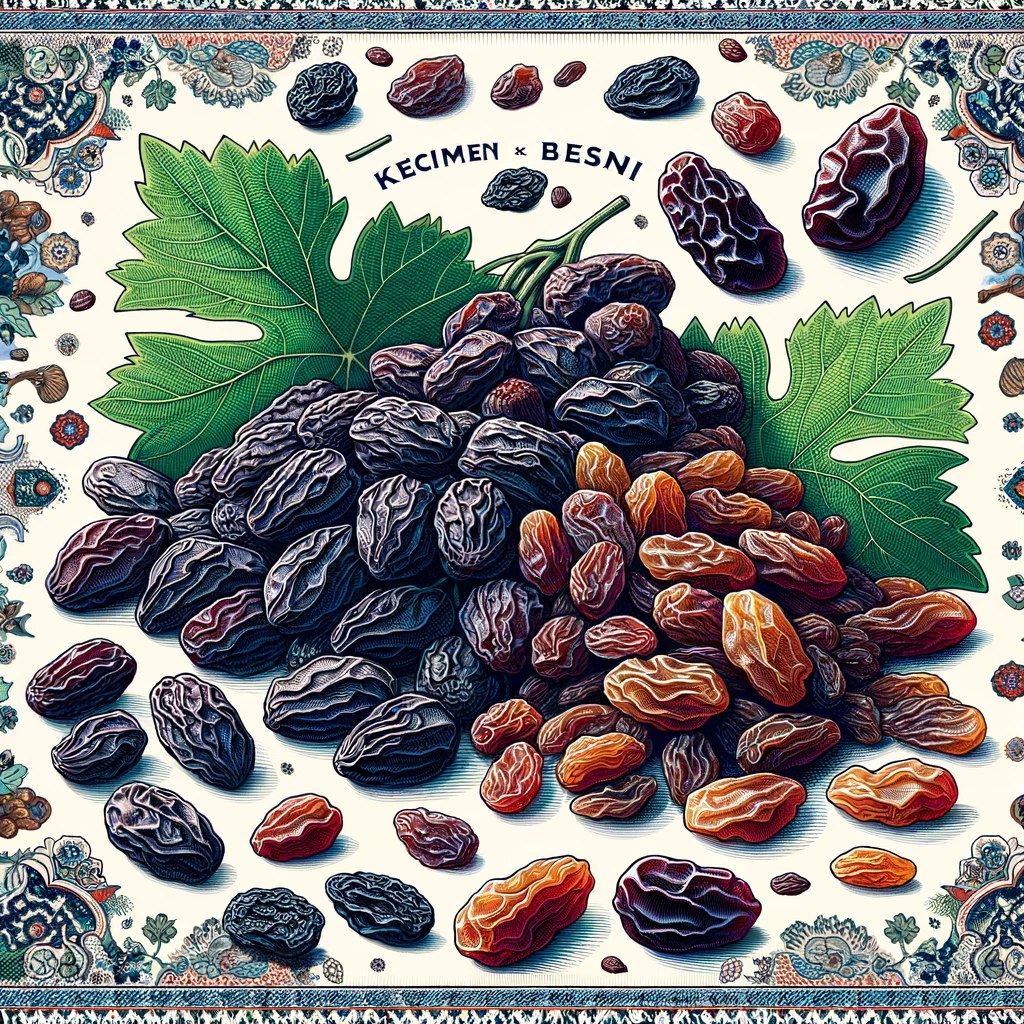

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

Veri Seti Bilgileri:

Türkiye'de yetiştirilen Kecimen ve Besni kuru üzüm çeşitlerine ait görüntüler CVS ile elde edilmiştir. Her iki çeşitten 450'şer adet olmak üzere toplam 900 adet kuru üzüm tanesi kullanılmıştır. Bu görüntüler çeşitli ön işleme aşamalarından geçirilmiş ve 7 morfolojik özellik çıkarılmıştır. Bu özellikler üç farklı yapay zeka tekniği kullanılarak sınıflandırılmıştır.

Öznitelik Bilgileri:

1. Alan: Kuru üzümün sınırları içindeki piksel sayısını verir.
2. Çevre: Kuru üzümün sınırları ile çevresindeki pikseller arasındaki mesafeyi hesaplayarak çevreyi ölçer.
3. MajorAxisLength: Kuru üzüm üzerine çizilebilecek en uzun çizgi olan ana eksenin uzunluğunu verir.
4. MinorAxisLength: Kuru üzüm üzerine çizilebilecek en kısa çizgi olan küçük eksenin uzunluğunu verir.
5. Eksantriklik: Kuru üzüm ile aynı momentlere sahip olan elipsin dış merkezliliğinin bir ölçüsünü verir.
6. KonveksAlan: Kuru üzümün oluşturduğu bölgenin en küçük dışbükey kabuğunun piksel sayısını verir.
7. Kapsam: Kuru üzümün oluşturduğu bölgenin sınırlayıcı kutudaki toplam piksellere oranını verir.
8. Sınıf: Keçimen ve Besni kuru üzümü.

# Import libraries

In [78]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10
pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [79]:
df0 = pd.read_excel("Raisin_Dataset.xlsx")
df = df0.copy()

In [80]:
df.shape

(900, 8)

In [81]:
df.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   
2  90856          442.267          266.328         0.798       93717   0.638   
3  45928          286.541          208.760         0.685       47336   0.700   
4  79408          352.191          290.828         0.564       81463   0.793   

   Perimeter    Class  
0   1184.040  Kecimen  
1   1121.786  Kecimen  
2   1208.575  Kecimen  
3    844.162  Kecimen  
4   1073.251  Kecimen

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [83]:
#Burada dublice veri olup olmadığına bakıyoruz.
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

Empty DataFrame
Columns: [Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, Extent, Perimeter, Class]
Index: []

In [84]:
df.describe().T

# datayı tanıyoruz

# std, meanden büyük veya meane yakın bir değerse datamızın genelinde bir outler problemi olduğuna dair bize çıkarım sağlar

# "min" ile %25'lik ilk çeyrek arasında ve/veya %75'lik 3.çeyrek ile max arasında uçurum varsa datamızın genelinde 
# olmasa da sınırlı sayıda outlier değerler olabileceğine dair çıkarım sağlar

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

In [85]:
df.Class.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

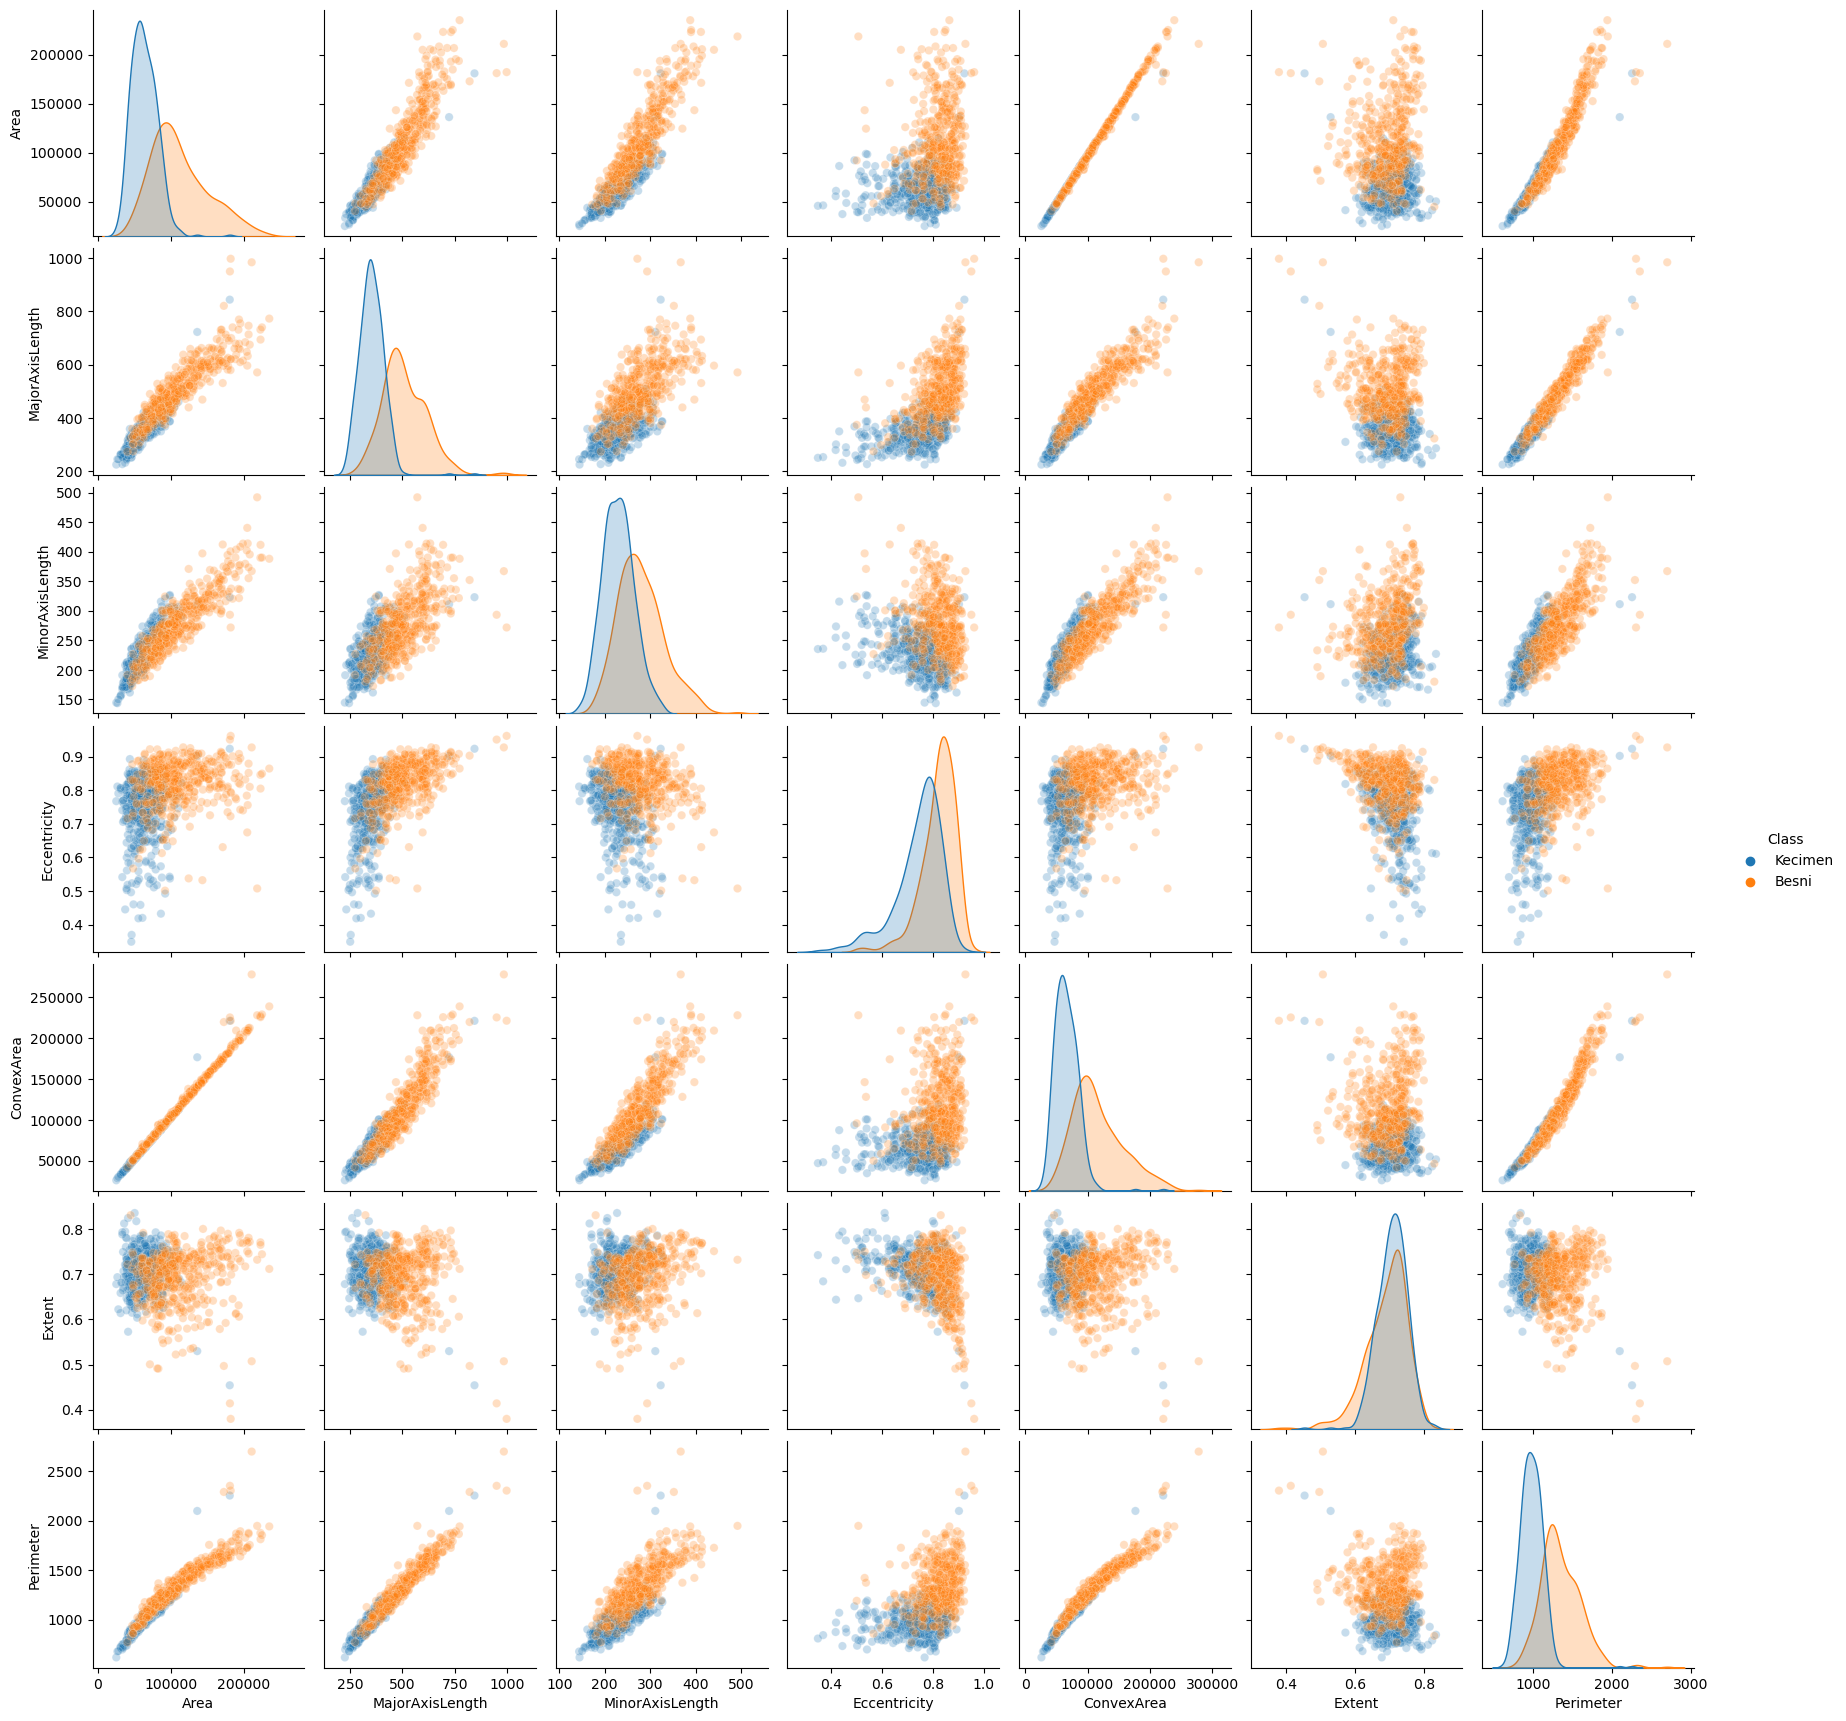

In [86]:
sns.pairplot(df, hue='Class',
             plot_kws = {'alpha' : 0.25})
plt.show()

In [87]:
features_num = ['Area', 'MajorAxisLength', 'MinorAxisLength', 
                'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

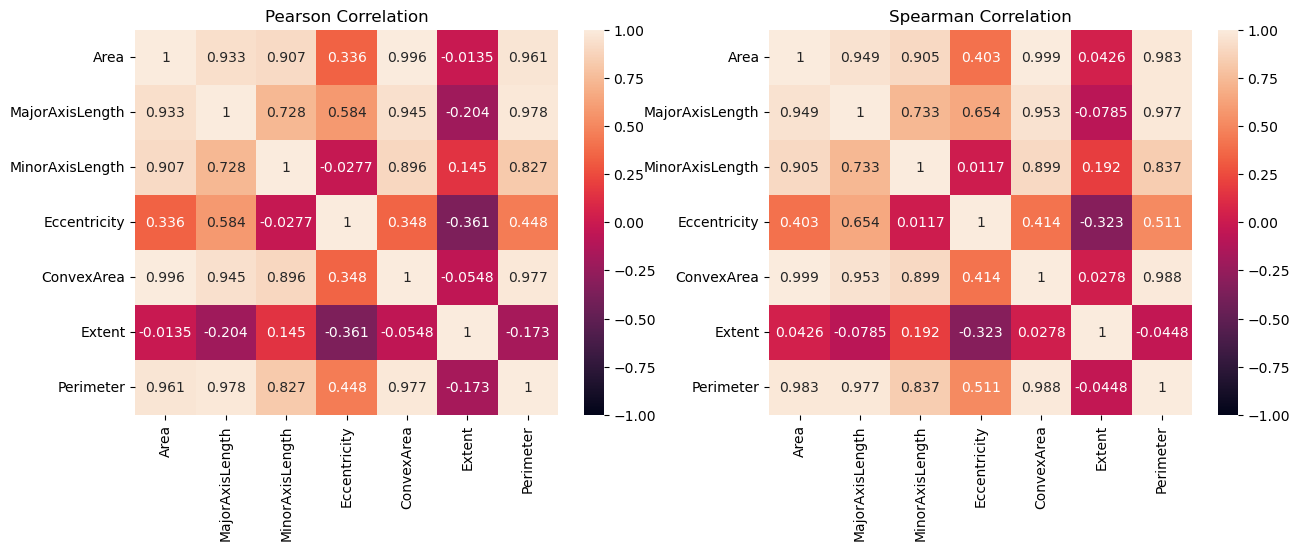

In [88]:
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, 
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True,
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

In [89]:
df["class"] = df['Class'].map({'Kecimen': 1, 'Besni': 0})

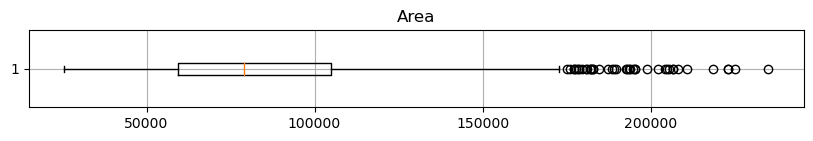

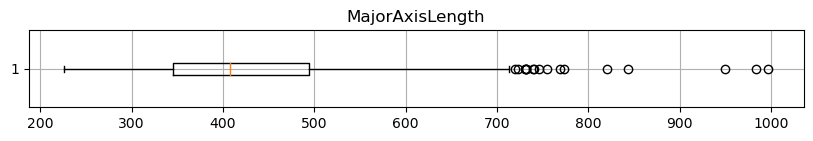

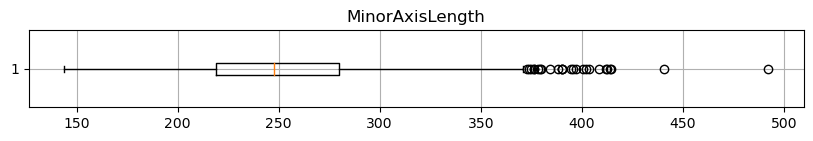

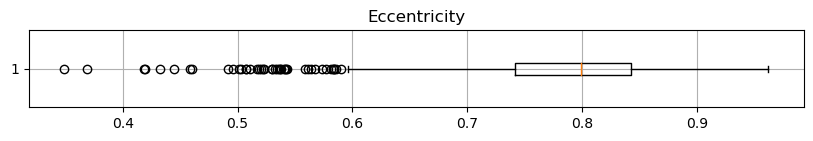

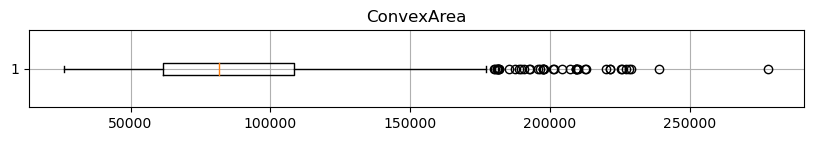

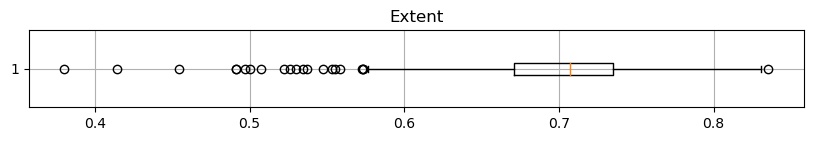

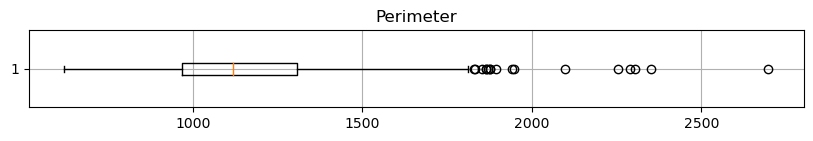

In [90]:
for f in features_num:
    plt.figure(figsize=(10,1))
    plt.boxplot(x=df[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

## Train | Test Split and Scaling

In [91]:
X= df.drop(columns="Class")
y= df.Class

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (720, 8)
Train target shape   :  (720,)
Test features shape  :  (180, 8)
Test target shape    :  (180,)


In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [99]:
log_model = LogisticRegression()

In [100]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen'

## Model Performance

In [101]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.01370701, 0.98629299],
       [0.98208532, 0.01791468],
       [0.00192646, 0.99807354],
       [0.99670589, 0.00329411],
       [0.00261568, 0.99738432],
       [0.98935865, 0.01064135],
       [0.00209196, 0.99790804],
       [0.00846287, 0.99153713],
       [0.00701437, 0.99298563],
       [0.00734091, 0.99265909],
       [0.01728879, 0.98271121],
       [0.99727814, 0.00272186],
       [0.99853796, 0.00146204],
       [0.00538807, 0.99461193],
       [0.99934464, 0.00065536],
       [0.99870832, 0.00129168],
       [0.01241247, 0.98758753],
       [0.0020727 , 0.9979273 ],
       [0.00690548, 0.99309452],
       [0.01201055, 0.98798945],
       [0.00446952, 0.99553048],
       [0.99737715, 0.00262285],
       [0.96887341, 0.03112659],
       [0.00487901, 0.99512099],
       [0.99809621, 0.00190379],
       [0.00606527, 0.99393473],
       [0.01206324, 0.98793676],
       [0.99809399, 0.00190601],
       [0.99227426, 0.00772574],
       [0.99920808, 0.00079192],
       [0.

In [102]:
np.set_printoptions(suppress = True)
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.01370701, 0.98629299],
       [0.98208532, 0.01791468],
       [0.00192646, 0.99807354],
       [0.99670589, 0.00329411],
       [0.00261568, 0.99738432],
       [0.98935865, 0.01064135],
       [0.00209196, 0.99790804],
       [0.00846287, 0.99153713],
       [0.00701437, 0.99298563],
       [0.00734091, 0.99265909],
       [0.01728879, 0.98271121],
       [0.99727814, 0.00272186],
       [0.99853796, 0.00146204],
       [0.00538807, 0.99461193],
       [0.99934464, 0.00065536],
       [0.99870832, 0.00129168],
       [0.01241247, 0.98758753],
       [0.0020727 , 0.9979273 ],
       [0.00690548, 0.99309452],
       [0.01201055, 0.98798945],
       [0.00446952, 0.99553048],
       [0.99737715, 0.00262285],
       [0.96887341, 0.03112659],
       [0.00487901, 0.99512099],
       [0.99809621, 0.00190379],
       [0.00606527, 0.99393473],
       [0.01206324, 0.98793676],
       [0.99809399, 0.00190601],
       [0.99227426, 0.00772574],
       [0.99920808, 0.00079192],
       [0.

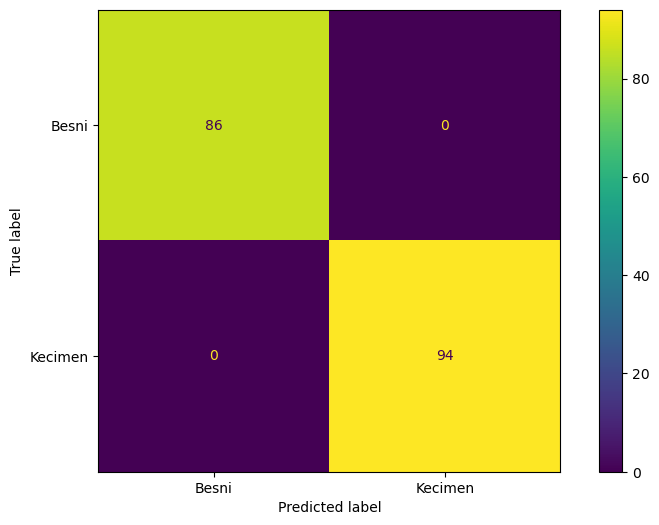

In [103]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.show()

In [104]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [105]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[86  0]
 [ 0 94]]
              precision    recall  f1-score   support

       Besni       1.00      1.00      1.00        86
     Kecimen       1.00      1.00      1.00        94

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Train_Set
[[364   0]
 [  0 356]]
              precision    recall  f1-score   support

       Besni       1.00      1.00      1.00       364
     Kecimen       1.00      1.00      1.00       356

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



### Cross Validate

In [106]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", 
                                                                   "precision_weighted",
                                                                  "recall_weighted",
                                                                  "f1_weighted"], cv = 10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy             1.000
test_precision_weighted   1.000
test_recall_weighted      1.000
test_f1_weighted          1.000
dtype: float64

### GridSearchCV

In [107]:
log_model = LogisticRegression(max_iter=5000)

In [108]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)

param_grid = {"penalty": penalty, 
             "C":C}

In [109]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv = 10)

In [111]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([     0.1       ,      0.20691381,      0.42813324,      0.88586679,
            1.83298071,      3.79269019,      7.8475997 ,     16.23776739,
           33.59818286,     69.51927962,    143.84498883,    297.63514416,
          615.84821107,   1274.2749857 ,   2636.65089873,   5455.59478117,
        11288.37891685,  23357.2146909 ,  48329.30238572, 100000.        ]),
                         'penalty': ['l1', 'l2']})

In [112]:
grid_model.best_params_

{'C': 0.8858667904100825, 'penalty': 'l2'}

In [113]:
grid_model.best_score_

1.0

In [114]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen'

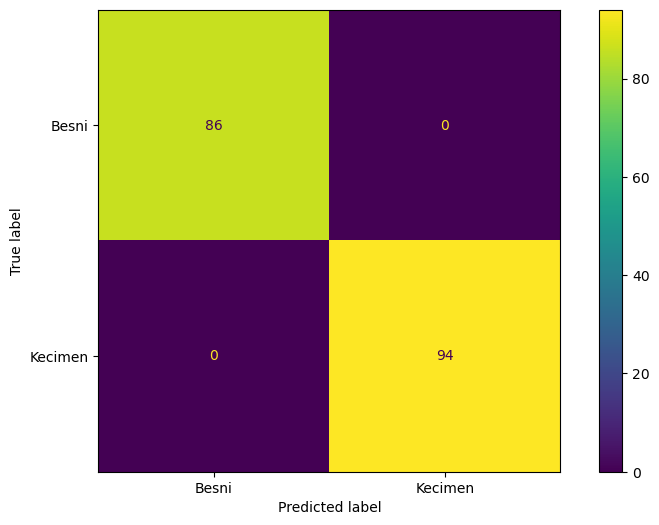

In [115]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test_scaled, y_test);

In [116]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[86  0]
 [ 0 94]]
              precision    recall  f1-score   support

       Besni       1.00      1.00      1.00        86
     Kecimen       1.00      1.00      1.00        94

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


Train_Set
[[364   0]
 [  0 356]]
              precision    recall  f1-score   support

       Besni       1.00      1.00      1.00       364
     Kecimen       1.00      1.00      1.00       356

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [117]:
from sklearn.metrics import RocCurveDisplay

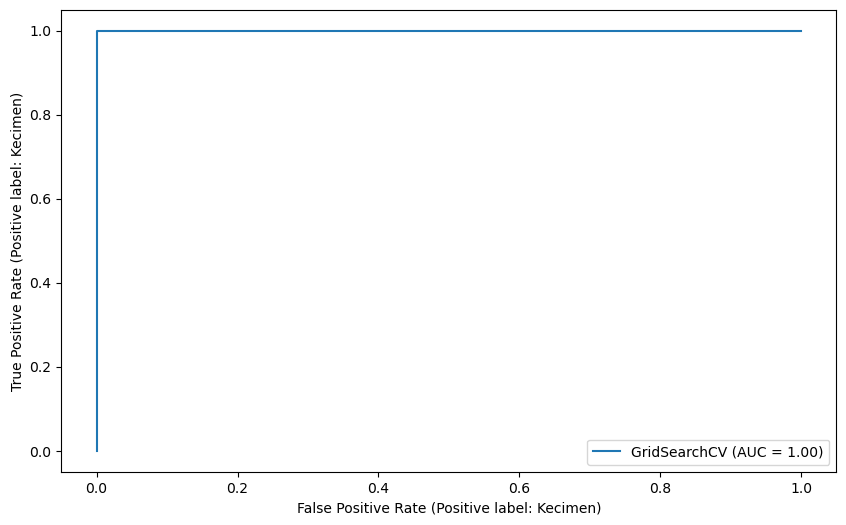

In [118]:
RocCurveDisplay.from_estimator(grid_model, X_test_scaled, y_test);

# Conclusion 

In [119]:
scaler = StandardScaler().fit(X)

In [120]:
import pickle
pickle.dump(scaler, open("scaler_raisin", "wb"))

In [121]:
X_scaled = scaler.transform(X)

In [122]:
grid_model.best_params_

{'C': 0.8858667904100825, 'penalty': 'l2'}

In [123]:
final_model = LogisticRegression(C=7.847599703514611, penalty = "l2").fit(X_scaled, y)

In [124]:
pickle.dump(final_model, open("final_model_raisin", "wb"))

In [129]:
new_data = pd.DataFrame()

for column in df0.columns[:-1]: 
    mean = df0[column].mean()
    std = df0[column].std()
    new_data[column] = np.random.normal(mean, std, 5)


classes = df0['Class'].unique()
new_data['Class'] = np.random.choice(classes, 5)

new_data.reset_index(drop=True, inplace=True)
new_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 118232.972          390.785          255.774         0.624   72313.942   
1  94040.073          555.202          274.555         0.715  101144.070   
2 106888.627          260.000          254.774         0.672   49991.930   
3  33735.913          362.132          251.341         0.787  128286.495   
4  71092.033          443.933          221.586         0.786  114252.762   

   Extent  Perimeter    Class  
0   0.680   1527.380    Besni  
1   0.695   1363.490    Besni  
2   0.607    918.121    Besni  
3   0.728   1164.612  Kecimen  
4   0.749   1284.300  Kecimen

In [130]:
sample = pd.DataFrame(new_data)
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 118232.972          390.785          255.774         0.624   72313.942   
1  94040.073          555.202          274.555         0.715  101144.070   
2 106888.627          260.000          254.774         0.672   49991.930   
3  33735.913          362.132          251.341         0.787  128286.495   
4  71092.033          443.933          221.586         0.786  114252.762   

   Extent  Perimeter    Class  
0   0.680   1527.380    Besni  
1   0.695   1363.490    Besni  
2   0.607    918.121    Besni  
3   0.728   1164.612  Kecimen  
4   0.749   1284.300  Kecimen

In [131]:
sample["Class"] = sample['Class'].map({'Kecimen': 1, 'Besni': 0})

In [132]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb"))

In [133]:
sample = sample.rename(columns={'Class': 'class'})

In [134]:
sample_scaled = scaler_raisin.transform(sample)

Kaydettiğini modeli çağır ve yeni gözlemi predict yap

In [135]:
final_model = pickle.load(open("final_model_raisin", "rb"))

In [136]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [138]:
sample["pred"] = predictions
sample["pred_proba_besni"] = predictions_proba[:,0]
sample["pred_proba_kecimen"] = predictions_proba[:,1]
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 118232.972          390.785          255.774         0.624   72313.942   
1  94040.073          555.202          274.555         0.715  101144.070   
2 106888.627          260.000          254.774         0.672   49991.930   
3  33735.913          362.132          251.341         0.787  128286.495   
4  71092.033          443.933          221.586         0.786  114252.762   

   Extent  Perimeter  class     pred  pred_proba_besni  pred_proba_kecimen  
0   0.680   1527.380      0    Besni             0.998               0.002  
1   0.695   1363.490      0    Besni             0.999               0.001  
2   0.607    918.121      0    Besni             0.997               0.003  
3   0.728   1164.612      1  Kecimen             0.001               0.999  
4   0.749   1284.300      1  Kecimen             0.001               0.999

In [ ]:
# PROJECT ENDED